In [1]:
# import sys
# assert sys.version_info >= (3,5)

# import sklearn
# assert sklearn.__version__>= "0.20"

# import numpy as np
# import os
# import pandas as pd

# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import seaborn as sns

# mpl.rc('axes',labelsize=14)
# mpl.rc('xtick',labelsize=12)
# mpl.rc('ytick',labelsize=12)

# import torch
# import random
# import torch.utils.data as data_utils
# import torch.nn.functional as F

In [2]:
# url  = 'https://raw.githubusercontent.com/hargurjeet/MachineLearning/Wheat-Seeds/seeds.csv'
# df = pd.read_csv(url)
# df.head()

In [3]:
# df.hist(figsize=(20,15))


In [4]:
# df.corr()

In [5]:
# plt.rcParams["figure.figsize"] = (20,6)
# sns.scatterplot(data=df, x = "Area",y="Kernel.Length",hue="Type",palette ="deep")

In [6]:
# sns.scatterplot(data=df, x = "Area",y="Kernel.Width",hue="Type",palette ="deep")

In [7]:
# sns.scatterplot(data=df,x="Kernel.Groove",y="Perimeter",hue="Type",palette="deep")

In [8]:
# from torch.utils.data import random_split
# import torch
# import random
# from torch.utils.data import TensorDataset

# def update_values_(df):
#     for i in range(len(df)):
#         df[i] = df[i] - 1
#     return df

# train_target = torch.tensor(df['Type'].values.astype(np.int64))
# train = torch.tensor(df.drop('Type',axis=1).values.astype(np.float32))

# train_tensor = TensorDataset(train,update_values_(train_target))
# train_ds,val_ds = random_split(train_tensor,[180,19])
# len(train_ds),len(val_ds)

In [9]:
# from torch.utils.data import DataLoader

# batch_size = 64

# train_loader = DataLoader(train_ds,batch_size,shuffle=True)
# val_loader = DataLoader(val_ds,batch_size)

In [10]:
# import torch.nn as nn

# input_size = 1*7
# num_classes = 3
# model = nn.Linear(input_size,num_classes)

In [11]:
# class Wheatseed(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.linear = nn.Linear(input_size,num_classes)
    
#     def forward(self,xb):
#         out = self.linear(xb)
#         return out

# model = Wheatseed()

In [12]:
# model.linear

In [13]:
# class Wheatseed(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.linear = nn.Linear(input_size,num_classes)
    
#     def forward(self,xb):
#         out = self.linear(xb)
#         return out
    
#     def training_step(self,batch):
#         images,labels = batch
#         out = self(images)
#         loss = F.cross_entropy(out,labels)
#         return loss
    
#     def validation_step(self,batch):
#         images,labels = batch
#         out = self(images)
#         loss = F.cross_entropy(out,labels)
#         acc = accuracy(out,labels)
#         return {'val_loss':loss,'val_acc':acc}
    
#     def validation_epoch_end(self,outputs):
#         batch_losses = [x['val_loss'] for x in outputs]
#         epoch_loss = torch.stack(batch_losses).mean()
#         batch_accs = [x['val_acc'] for x in outputs]
#         epoch_acc = torch.stack(batch_accs).mean()
#         return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}
    
#     def epoch_end(self,epoch,result):
#         print("Epoch [{}],val_loss: {:.4f}, val_acc: {:.4f}".format(epoch,result['val_loss'],result['val_acc']))

# model = Wheatseed()

In [14]:
# def accuracy(outputs,labels):
#     _, preds = torch.max(outputs,dim=1)
#     return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [15]:
# def fit(epochs,lr,model,train_loader,val_loader,opt_func=torch.optim.SGD):
#     optimizer = opt_func(model.parameters(),lr)
#     history = []
    
#     for epoch in range(epochs):
        
#         for batch in train_loader:
#             loss = model.training_step(batch)
#             loss.backward()
#             optimizer.step()
#             optimizer.zero_grad()
        
#         result = evaluate(model,val_loader)
#         model.epoch_end(epoch,result)
#         history.append(result)
#     return history


# def evaluate(model,val_loader):
#     outputs = [model.validation_step(batch) for batch in val_loader]
#     return model.validation_epoch_end(outputs)

In [16]:
# result0 = evaluate(model,val_loader)
# result0

In [17]:
#history1 = fit(5,0.001,model,train_loader,val_loader)

In [18]:
#history2 = fit(5,0.001,model,train_loader,val_loader)

In [19]:
#history3 = fit(5,0.001,model,train_loader,val_loader)

In [20]:
#history4 = fit(5,0.001,model,train_loader,val_loader)

In [21]:
#history = [result0] + history1 + history2 + history3 + history4
# accuracies = [result['val_acc'] for result in history]
# plt.rcParams["figure.figsize"] = (6,6)
# plt.plot(accuracies,'-x')
# plt.xlabel('epoch')
# plt.ylabel('accuracy')
# plt.grid()
# plt.title('Accuracy vs No. of epochs')
# plt.show()

In [22]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from tqdm import tqdm
import torch

sns.set_style("darkgrid")

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

/Users/thrilok/miniforge3/envs/pytorch/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
separable = False
while not separable:
    samples = make_classification(n_samples=1000,n_features=2,n_redundant=0,n_informative=1,n_clusters_per_class=1,flip_y=-1)
    red = samples[0][samples[1] == 0]
    blue = samples[0][samples[1] == 1]
    separable = any([red[:,k].max() < blue[:,k].min() or red[:,k].min() > blue[:,k].max() for k in range(2)])
    

In [24]:
red_labels = np.zeros(len(red))
blue_labels = np.ones(len(blue))

In [25]:
labels = np.append(red_labels,blue_labels)
inputs = np.concatenate((red,blue),axis=0)

In [26]:
X_train, X_test,y_train,y_test = train_test_split(inputs, labels,test_size=0.33,random_state= 42)

In [27]:
class LogisticRegression(torch.nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LogisticRegression,self).__init__()
        self.linear = torch.nn.Linear(input_dim,output_dim)
    
    def forward(self,x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

In [28]:
epochs = 200000
input_dim = 2
output_dim = 1
learning_rate = 0.01

model = LogisticRegression(input_dim,output_dim)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

X_train,X_test = torch.Tensor(X_train),torch.Tensor(X_test)
y_train,y_test = torch.Tensor(y_train),torch.Tensor(y_test)

In [29]:
losses =[]
losses_test = []
Iterations = []
iter = 0
for epoch in tqdm(range(int(epochs)), desc='Training Epochs'):
    x = X_train
    labels = y_train
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs),labels)
    loss.backward()
    optimizer.step()
    iter+= 1
    
    if iter%10000 == 0:
        with torch.no_grad():
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(model(X_test))
            loss_test = criterion(outputs_test,y_test)
            predicted_test= outputs_test.round().detach().numpy()
            total_test += y_test.size(0)
            correct_test += np.sum(predicted_test == y_test.detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
            
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            
            print(f"Iteration: {iter}. \n Test - Loss: {loss_test.item()}.Accuracy:{accuracy_test}")
            print(f"Train - Loss: {loss.item()}. Accuracy:{accuracy}\n")
        

Training Epochs:   6%|██▏                                 | 12416/200000 [00:00<00:10, 17885.03it/s]

Iteration: 10000. 
 Test - Loss: 0.017205530777573586.Accuracy:100.0
Train - Loss: 0.01787172444164753. Accuracy:99.85074626865672



Training Epochs:  12%|████▏                               | 23177/200000 [00:01<00:09, 17931.24it/s]

Iteration: 20000. 
 Test - Loss: 0.009488829411566257.Accuracy:100.0
Train - Loss: 0.010550038889050484. Accuracy:99.85074626865672



Training Epochs:  16%|█████▊                              | 32119/200000 [00:01<00:09, 17775.55it/s]

Iteration: 30000. 
 Test - Loss: 0.00669466145336628.Accuracy:100.0
Train - Loss: 0.007867339998483658. Accuracy:99.85074626865672



Training Epochs:  21%|███████▋                            | 42795/200000 [00:02<00:08, 17662.39it/s]

Iteration: 40000. 
 Test - Loss: 0.005224023014307022.Accuracy:100.0
Train - Loss: 0.006429117638617754. Accuracy:99.85074626865672



Training Epochs:  27%|█████████▋                          | 53520/200000 [00:03<00:08, 17694.11it/s]

Iteration: 50000. 
 Test - Loss: 0.0043084751814603806.Accuracy:100.0
Train - Loss: 0.005514625459909439. Accuracy:99.85074626865672



Training Epochs:  31%|███████████▏                        | 62467/200000 [00:03<00:07, 17893.35it/s]

Iteration: 60000. 
 Test - Loss: 0.003680482739582658.Accuracy:100.0
Train - Loss: 0.004873191472142935. Accuracy:99.85074626865672



Training Epochs:  37%|█████████████▏                      | 73130/200000 [00:04<00:07, 17579.53it/s]

Iteration: 70000. 
 Test - Loss: 0.003221458289772272.Accuracy:100.0
Train - Loss: 0.004393608774989843. Accuracy:99.85074626865672



Training Epochs:  41%|██████████████▊                     | 81971/200000 [00:04<00:06, 17696.62it/s]

Iteration: 80000. 
 Test - Loss: 0.002870592288672924.Accuracy:100.0
Train - Loss: 0.004018631298094988. Accuracy:99.85074626865672



Training Epochs:  46%|████████████████▋                   | 92760/200000 [00:05<00:05, 17915.86it/s]

Iteration: 90000. 
 Test - Loss: 0.0025931503623723984.Accuracy:100.0
Train - Loss: 0.0037154746241867542. Accuracy:99.85074626865672



Training Epochs:  52%|██████████████████                 | 103446/200000 [00:05<00:05, 17558.28it/s]

Iteration: 100000. 
 Test - Loss: 0.0023680373560637236.Accuracy:100.0
Train - Loss: 0.003464127192273736. Accuracy:99.85074626865672



Training Epochs:  56%|███████████████████▋               | 112394/200000 [00:06<00:04, 17882.23it/s]

Iteration: 110000. 
 Test - Loss: 0.002181760733947158.Accuracy:100.0
Train - Loss: 0.00325165712274611. Accuracy:99.85074626865672



Training Epochs:  62%|█████████████████████▌             | 123036/200000 [00:06<00:04, 17549.17it/s]

Iteration: 120000. 
 Test - Loss: 0.002024539979174733.Accuracy:100.0
Train - Loss: 0.003068774938583374. Accuracy:100.0



Training Epochs:  66%|███████████████████████            | 131869/200000 [00:07<00:03, 17692.84it/s]

Iteration: 130000. 
 Test - Loss: 0.0018905005417764187.Accuracy:100.0
Train - Loss: 0.002909724833443761. Accuracy:100.0



Training Epochs:  71%|████████████████████████▉          | 142643/200000 [00:08<00:03, 17954.49it/s]

Iteration: 140000. 
 Test - Loss: 0.001774098607711494.Accuracy:100.0
Train - Loss: 0.0027691179420799017. Accuracy:100.0



Training Epochs:  77%|██████████████████████████▊        | 153445/200000 [00:08<00:02, 17982.09it/s]

Iteration: 150000. 
 Test - Loss: 0.0016740115825086832.Accuracy:100.0
Train - Loss: 0.0026454227045178413. Accuracy:100.0



Training Epochs:  81%|████████████████████████████▍      | 162440/200000 [00:09<00:02, 17918.72it/s]

Iteration: 160000. 
 Test - Loss: 0.0015824346337467432.Accuracy:100.0
Train - Loss: 0.002531802048906684. Accuracy:100.0



Training Epochs:  87%|██████████████████████████████▎    | 173216/200000 [00:09<00:01, 17877.81it/s]

Iteration: 170000. 
 Test - Loss: 0.0015049719950184226.Accuracy:100.0
Train - Loss: 0.0024323444813489914. Accuracy:100.0



Training Epochs:  91%|███████████████████████████████▉   | 182198/200000 [00:10<00:01, 17739.91it/s]

Iteration: 180000. 
 Test - Loss: 0.001432335702702403.Accuracy:100.0
Train - Loss: 0.002339267637580633. Accuracy:100.0



Training Epochs:  96%|█████████████████████████████████▋ | 192785/200000 [00:10<00:00, 17568.34it/s]

Iteration: 190000. 
 Test - Loss: 0.0013687332393601537.Accuracy:100.0
Train - Loss: 0.0022556395269930363. Accuracy:100.0



Training Epochs: 100%|███████████████████████████████████| 200000/200000 [00:11<00:00, 17764.33it/s]

Iteration: 200000. 
 Test - Loss: 0.001311505795456469.Accuracy:100.0
Train - Loss: 0.002179124392569065. Accuracy:100.0



In [33]:
def model_plot(model,X,y,title):
    parm = {}
    b = []
    for name,param in model.named_parameters():
        parm[name] = param.detach().numpy()
    
    w = parm['linear.weight'][0]
    b = parm['linear.bias'][0]
    plt.scatter(X[:,0],X[:,1],c=y,cmap='jet')
    u = np.linspace(X[:,0].min(),X[:,0].max(),2)
    plt.plot(u, (0.5-b-w[0] * u)/w[1])
    plt.xlim(X[:,0].min()-0.5, X[:,0].max() + 0.5)
    plt.ylim(X[:,1].min() - 0.5, X[:,1].max() + 0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

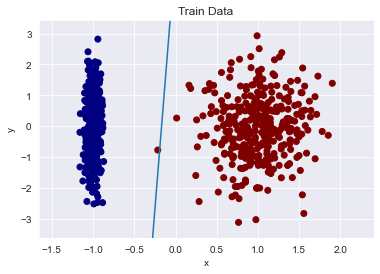

In [34]:
model_plot(model,X_train,y_train,'Train Data')

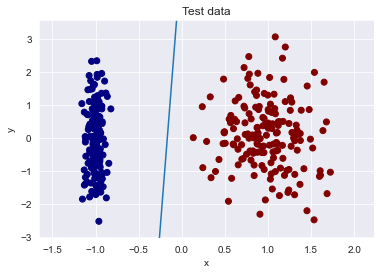

In [35]:
model_plot(model,X_test,y_test,'Test data')